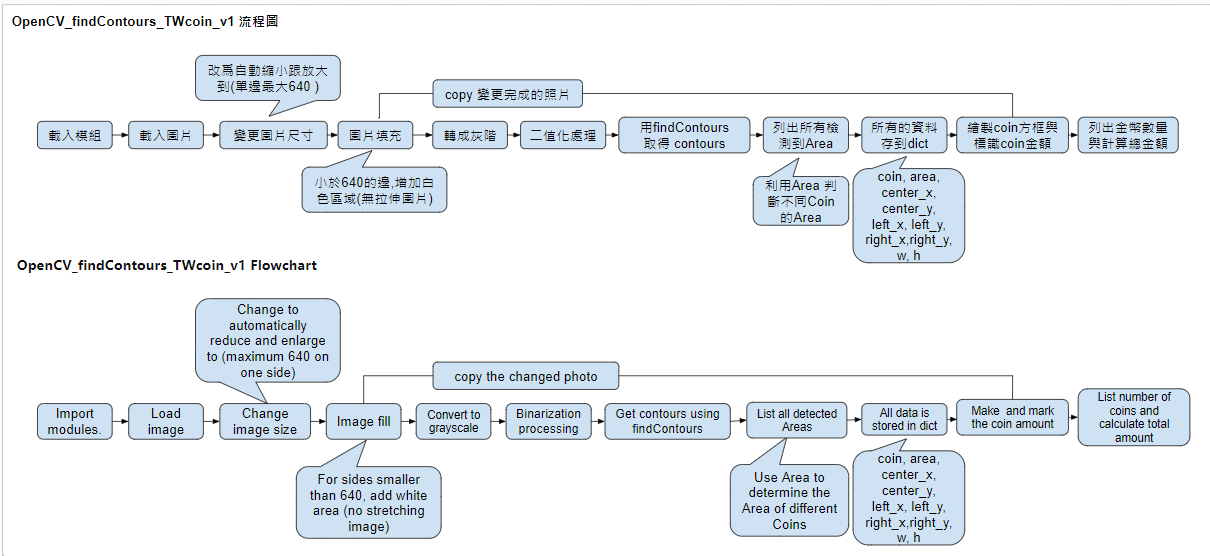

# 導入需要的模組. Import the necessary modules.

In [25]:
import cv2
import numpy as np
from numpy import array, uint8


# 載入圖片 Load image

In [26]:
img = cv2.imread("twcoin.jpg")
# img = cv2.imread("twcoin_1.jpg")


# 等比例縮放尺寸 Change image size

In [27]:
original_height, original_width = img.shape[:2] # Get the original size of the image

new_width = new_height = 640 # Set new size

# Determine which of the width and height of the image is closer to 640
if original_width > original_height: # If the original width is greater than the height, execute here.
    # 計算寬度縮放比例 Calculate width scaling ratio
    if original_width > new_width: # If the original width is greater than 640, execute here to obtain the scaling ratio of the size.
        scale = original_width / new_width
        img = cv2.resize(img,(new_width, int(original_height/scale)))
        
    else: # If the original width is less than 640, execute here to obtain the scaling ratio of the size.
        scale = new_width / original_width
        print("scle" , scale)
        print("int(original_height*scale) = ", int(original_height*scale))
        img = cv2.resize(img, (new_width,int(original_height*scale)))
    
else: # If the original width is less than the height, execute here.
    if original_height > new_height: # If the original height is greater than 640, execute here to obtain the scaling ratio of the size.
        scale = original_height / new_height
        img = cv2.resize(img, (int(original_width/scale), new_height))
        
    else: # If the original width is less than 640, execute here to obtain the scaling ratio of the size.
        scale = new_height / original_height
        img = cv2.resize(img, (int(new_width*scale), new_height))

print('Resized Dimensions : ', img.shape)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

scle 1.0
int(original_height*scale) =  480
Resized Dimensions :  (480, 640, 3)


# 寬或高不到640的位置顯示白色 Positions with a width or height less than 640 are displayed in white.

In [28]:
# If the original image's height is greater than its width.
if img.shape[0] > img.shape[1]:
    pad = (img.shape[0] - img.shape[1]) // 2
    img = cv2.copyMakeBorder(img, 0, 0, pad, pad, cv2.BORDER_CONSTANT, value=[255, 255, 255])

else: # If the width of the original image is greater than the height.
    pad = (img.shape[1] - img.shape[0]) // 2
    img = cv2.copyMakeBorder(img, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=[255, 255, 255])

# 縮放後的尺寸
print('Resized Dimensions : ', img.shape)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions :  (640, 640, 3)


# copy 變更完成照片 copy the changed photo

In [29]:
image_copy = img.copy()

# 轉成灰階Gray Convert to grayscale

In [30]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('GRAY', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 二值化-顔色反轉 Binarization processing

In [31]:
ret, binary_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY_INV) 

cv2.imshow('Binary_img', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 用findContours 取得 contours. Get contours using findContours


In [32]:
contours, _ = cv2.findContours(binary_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 列出所有的區域 List all detected Areas
Use Area to determine the Area of different Coins


In [33]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10000:
        print(f"Contour Area: {area}")

Contour Area: 15928.5
Contour Area: 12783.5
Contour Area: 22405.5


# 判斷coin area. Use Area to determine the Area of different Coins

Contour Area: 30455.5
Contour Area: 18319.5
Contour Area: 31266.5

# 把所有的資料存到contours_dic{}. All data is stored in contours_dic{}


In [34]:
coin_area = {"10coin":30000,"5coin":20000,"1coin":18000} # Set coin_area{} from the area where the coin is judged.
contours_dic = {}

for i, contour in enumerate(contours):
    
    area = cv2.contourArea(contour) # Get the area of ​​the contour
    
    if area < 10000: # If the area is less than 10000, it will be skipped.
        continue
    
    for key in coin_area: 
        if abs(area - coin_area[key]) <= 2000: # Determine which coin.
            coin = key
           
    M = cv2.moments(contour) # Calculate the centroid of the contour.
    if M['m00'] != 0:
        center_x = int(M['m10'] / M['m00'])
        center_y = int(M['m01'] / M['m00'])
    else:
        center_x = center_y = 0

    x, y, w, h = cv2.boundingRect(contour) # Gets the rectangular bounds of the outline.
    right_x = x + w
    right_y = y + h

    # Store information in contours_dic{}
    contours_dic[i] = {"coin": coin, 
                       "area": area, 
                       "center_x": center_x, 
                       "center_y": center_y, 
                       "left_x": x,
                       "left_y": y,
                       "right_x": right_x, 
                       "right_y": right_y, 
                       "width": w, 
                       "height": h
                       }
print(contours_dic)

{0: {'coin': '10coin', 'area': 15928.5, 'center_x': 191, 'center_y': 435, 'left_x': 120, 'left_y': 364, 'right_x': 264, 'right_y': 508, 'width': 144, 'height': 144}, 1: {'coin': '10coin', 'area': 12783.5, 'center_x': 438, 'center_y': 394, 'left_x': 375, 'left_y': 330, 'right_x': 503, 'right_y': 460, 'width': 128, 'height': 130}, 2: {'coin': '10coin', 'area': 22405.5, 'center_x': 297, 'center_y': 311, 'left_x': 212, 'left_y': 226, 'right_x': 385, 'right_y': 396, 'width': 173, 'height': 170}}


# 繪製coin方框與標識coin金額 Make  and mark the coin amount


In [35]:
# Get the required data from contours_dic.
for key, value in contours_dic.items():
    coin = value['coin']
    area = value['area']
    center_x = value['center_x']
    center_y = value['center_y']
    left_x = value['left_x']
    left_y = value['left_y']
    right_x = value['right_x']
    right_y = value['right_y']
    width = value['width']
    height = value['height']
    
    # Draw the frame and Area
    cv2.rectangle(image_copy, (left_x, left_y), (right_x , right_y ), (0, 255, 255), 2)
    cv2.putText(image_copy, f'Area : {area}', (left_x, left_y-5), 2, .6, (0,0,255), 1, 5)
    
    # Draw the center of the circle and coin.
    cv2.circle(image_copy, (center_x, center_y), 5 , (0, 255, 255), thickness=-1)
    cv2.putText(image_copy, f'{coin}', (center_x, center_y-10), 2, .6, (0,0,255), 1, 5)
    

cv2.imshow('Image with Contours', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 列出金幣數量與計算總金額 List number of coins and calculate total amount


In [36]:
num_10coin = sum(1 for item in contours_dic.values() if item['coin'] == '10coin')
num_5coin = sum(1 for item in contours_dic.values() if item['coin'] == '5coin')
num_1coin = sum(1 for item in contours_dic.values() if item['coin'] == '1coin')
total_amount = (10*num_10coin)+(5*num_5coin)+num_1coin
print(f"有 {num_10coin} 個 10coin")
print(f"有 {num_5coin} 個 5coin")
print(f"有 {num_1coin} 個 1coin")
print(f"Total amount: {total_amount} ")

cv2.putText(image_copy, f"10coin : {num_10coin} pcs", (5, 15), 2, .6, (0,0,255), 1, 5)
cv2.putText(image_copy, f"5coin : {num_5coin} pcs", (5, 30), 2, .6, (0,0,255), 1, 5)
cv2.putText(image_copy, f"1coin : {num_1coin} pcs", (5, 45), 2, .6, (0,0,255), 1, 5)
cv2.putText(image_copy, f"Total amount: NT$ {total_amount}", (5, 60), 2, .6, (0,0,255), 1, 5)
# 显示图像
cv2.imshow('Image with Contours', image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

有 3 個 10coin
有 0 個 5coin
有 0 個 1coin
Total amount: 30 
